Para resolver este ejercicio, primero definimos la función de Likelihood y las probabilidades posteriores, aplicando el teorema de Bayes. En este caso, queremos determinar la probabilidad posteriori del sesgo de la moneda (p), basándonos en el número de caras y secas observadas, utilizando dos priors: uno uniforme y otro gaussiano.La idea es comparar ambas distribuciones.
La probabilidad de obtener \( k \) caras en \( n \) lanzamientos, dada una probabilidad \( p \), está dada por la distribución binomial:

$$
L(p) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

donde:
- \( n = 100 \) es el número total de lanzamientos,
- \( k = 60 \) es el número de caras,
- \( p \) es la probabilidad de obtener cara (el parámetro que estamos buscando).
En este caso, el prior uniforme es \( P(p) = 1 \) para \( p \in [0, 1] \). Según el teorema de Bayes, la probabilidad posterior \( P(p \mid D) \) se calcula como:

$$
P(p \mid D) \propto L(p) P(p)
$$

donde \( D \) representa los datos observados. Debido al prior uniforme, simplemente multiplicamos la verosimilitud por \( P(p) = 1 \), lo que da como resultado:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40}
$$
Para un prior gaussiano con media \( 0.5 \) y desviación estándar \( 0.1 \), la distribución prior es:

$$
P(p) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(p - 0.5)^2}{2 \sigma^2} \right)
$$

donde \( \sigma = 0.1 \). Entonces, la probabilidad posterior es:

$$
P(p \mid D) \propto p^{60} (1 - p)^{40} \exp \left( -\frac{(p - 0.5)^2}{2 \times (0.1)^2} \right)
$$


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
from math import comb

In [29]:
Tiros=100
caras=60
secas=40

In [30]:
#Definimos la funcion verosimilitud, distribucion binomial
def likelihood(p,k,n):
    L=comb(n,k)*(p**k)*((1-p)**(n-k))
    return(L)

In [31]:
likelihood(p=100,k=60,n=100)

919584243022829686424313608970901706545258034539779347691797145274851643542927045193944587623372562004489720000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [32]:
#Queremos definir los priors, para esto necesitamos darle una suerte de condicion.

def priors_uniforme(p):
    if 0<=p<=1: 
        return(1) # Prior uniforme, constante en [0, 1]
    else:
        return(0)

In [33]:
print(priors_uniforme(p=0.1))
print(priors_uniforme(2))

1
0


In [34]:
#Ahora para definir la probabilidad posterior solo se multiplica el likelihood por el prior
def probabilidad_posterior_uniforme(p,k,n):
    L=likelihood(p,k,n)
    P=priors_uniforme(p)
    prob_post=L*P
    return(prob_post)

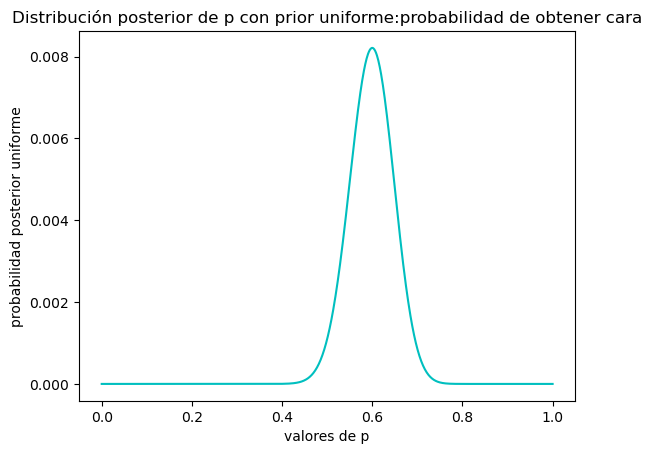

In [35]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_unif = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_uniforme(p, caras, Tiros)
    probabilidades_unif.append(probabilidad)
p_unif_norm=probabilidades_unif/np.sum(probabilidades_unif)
plt.plot(valores_p,p_unif_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior uniforme:probabilidad de obtener cara')
plt.show()

Ahora queremos definir la distribucion gaussiana, ya tenemos definida la funcion likelihood, nos faltaria definir los prior gaussianos y luego la probabilidad posterior gaussiana.

In [36]:
def priors_gaussiano(p,mu=0.5,sigma=0.1):
    P= st.norm.pdf(p,mu,sigma) # Prior gaussiano centrado en 0.5 con desviación estándar 0.1
    return(P)

In [37]:
def probabilidad_posterior_gaussiana(p,k,n):
    P=priors_gaussiano(p,mu=0.5,sigma=0.1)
    L=likelihood(p,k,n)
    prob_post=P*L
    return(prob_post)

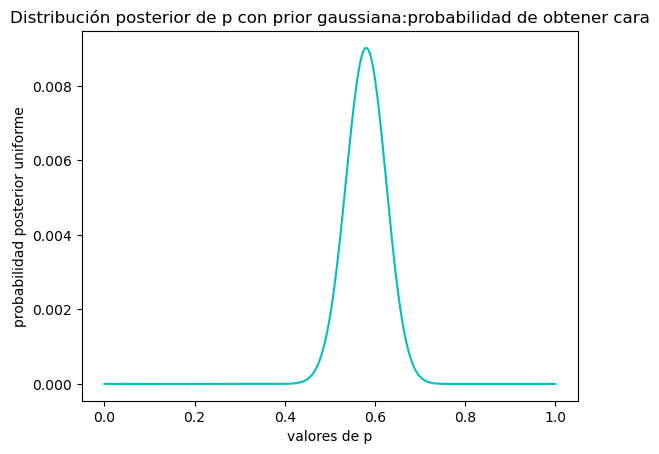

In [38]:
#Grafiquemos la probabilidad uniforme en principio
valores_p=np.linspace(0,1,1000)
probabilidades_gauss = [] 
for p in valores_p:
    probabilidad = probabilidad_posterior_gaussiana(p, caras, Tiros)
    probabilidades_gauss.append(probabilidad)
p_gauss_norm=probabilidades_gauss/np.sum(probabilidades_gauss)
plt.plot(valores_p,p_gauss_norm,color='#00BFBF')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior uniforme')
plt.title('Distribución posterior de p con prior gaussiana:probabilidad de obtener cara')

plt.show()

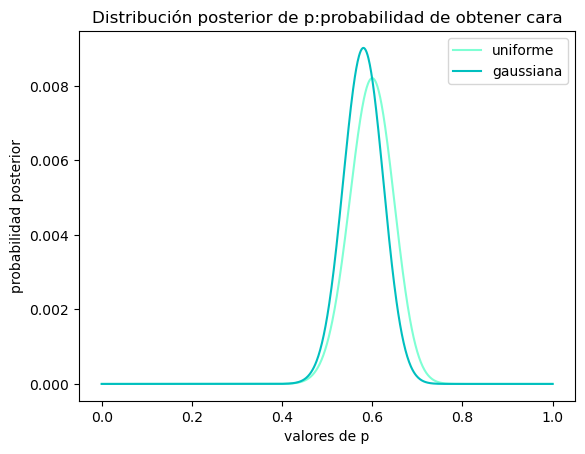

0.001
0.0009999999999999998


In [39]:
plt.plot(valores_p,p_unif_norm,color='aquamarine',label='uniforme')
plt.plot(valores_p,p_gauss_norm,color='#00BFBF',label='gaussiana')
plt.xlabel('valores de p')
plt.ylabel('probabilidad posterior')
plt.title('Distribución posterior de p:probabilidad de obtener cara')
plt.legend()
plt.show()
media_gauss=np.mean(p_gauss_norm)
media_unif=np.mean(p_unif_norm)
print(media_gauss)
print(media_unif)

 Ejercicio 8. Frecuentistas vs Bayesianos
Supongase que se mide el tiempo de decaimiento de una part ́ıcula, el cual es modelado como una
funcion exponencial con constante de decaimiento λ.
 Simule 50 mediciones del tiempo de decaimiento
 Estime λ utilizando el estimador de Maximum Likelihood
 Estime λ utilizando inferencia Bayesiana asumiendo un prior plano
 Compare las dos estimaciones
 La función de verosimilitud para una muestra de tiempos de decaimiento \( t_i \) es:

$$
L(\lambda) = \prod_{i=1}^{N} \lambda e^{-\lambda t_i}
$$

Maximizar esta verosimilitud con respecto a \( \lambda \) nos da el estimador de máxima verosimilitud:

$$
\hat{\lambda}_{\text{MLE}} = \frac{N}{\sum_{i=1}^N t_i}
$$
Asumimos un prior plano (uniforme) en \( \lambda \). La probabilidad posterior es proporcional a la verosimilitud, así que podemos calcular la probabilidad posterior como:

$$
P(\lambda | \{t_i\}) \propto L(\lambda)
$$

Para esto, podemos calcular la posterior en un rango de valores de \( \lambda \) y encontrar el valor de \( \lambda \) que maximiza la posterior.


Estimación de lambda (Máxima Verosimilitud): 1.5251
Estimación de lambda (Bayesiana): 1.5556


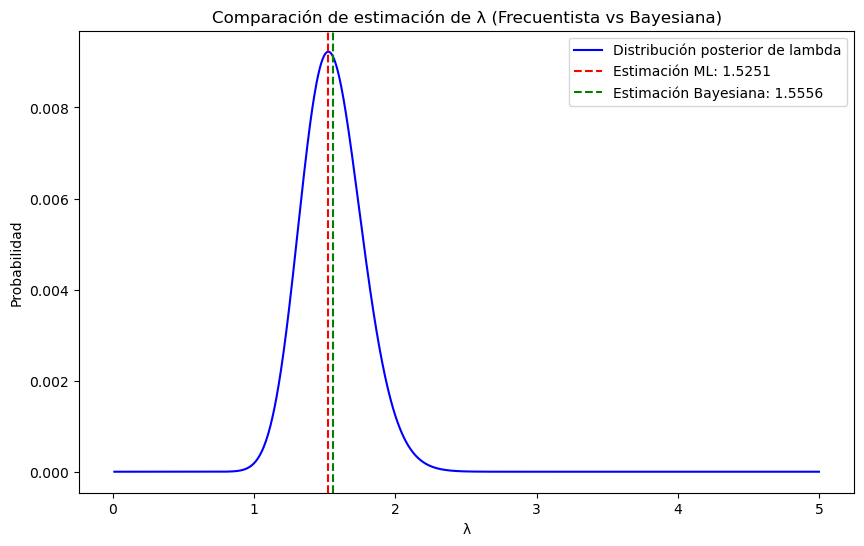

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Paso 1: Simulación de datos
lambda_real = 1.5  # Valor real de la constante de decaimiento
num_mediciones = 50
# Generamos 50 mediciones de tiempo de decaimiento
datos = np.random.exponential(1 / lambda_real, num_mediciones)

# Paso 2: Estimación de lambda usando máxima verosimilitud
lambda_ml = 1 / np.mean(datos)
print(f"Estimación de lambda (Máxima Verosimilitud): {lambda_ml:.4f}")

# Paso 3: Estimación de lambda usando inferencia Bayesiana
# Definimos valores posibles de lambda
valores_lambda = np.linspace(0.01, 5, 1000)
# Calculamos la verosimilitud para cada valor de lambda
verosimilitud = [np.prod(expon.pdf(datos, scale=1/lam)) for lam in valores_lambda]
# Como prior es plano, la posterior es proporcional a la verosimilitud
posterior = verosimilitud / np.sum(verosimilitud)  # Normalizamos

# Cálculo del valor de lambda usando la media de la distribución posterior
lambda_bayes = np.sum(valores_lambda * posterior)
print(f"Estimación de lambda (Bayesiana): {lambda_bayes:.4f}")

# Paso 4: Graficar las distribuciones
plt.figure(figsize=(10, 6))
plt.plot(valores_lambda, posterior, label="Distribución posterior de lambda", color="blue")
plt.axvline(lambda_ml, color="red", linestyle="--", label=f"Estimación ML: {lambda_ml:.4f}")
plt.axvline(lambda_bayes, color="green", linestyle="--", label=f"Estimación Bayesiana: {lambda_bayes:.4f}")
plt.xlabel("λ")
plt.ylabel("Probabilidad")
plt.title("Comparación de estimación de λ (Frecuentista vs Bayesiana)")
plt.legend()
plt.show()
